#### **Python Project EDA & Data Viz - Airbnb Listings in New York**

**1. Importing Dependencies**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**2. Loading the Dataset**

In [65]:
data = pd.read_csv('airbnb.csv', encoding_errors = 'ignore')

**3. Data Exploration**

In [66]:
# (Rows, Columns):
data.shape

(20770, 22)

In [67]:
# Exploring Column Names:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')

In [68]:
# Exploring First 3 Rows:
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1


In [69]:
# Statistical Summary:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.077000e+04,2.077000e+04,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20770.000000
mean,3.033858e+17,1.749049e+08,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,1.723592
std,3.901221e+17,1.725657e+08,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,1.211993
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.707260e+07,2.041184e+07,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.992852e+07,1.086990e+08,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.220000e+17,3.143997e+08,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


**4. Data Cleaning**

4A. Dealing with NULL Values:

In [70]:
# Checking for NULL Values:
data.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      7
latitude                           7
longitude                          7
room_type                          7
price                             34
minimum_nights                     7
number_of_reviews                  7
last_review                        7
reviews_per_month                  7
calculated_host_listings_count     7
availability_365                   7
number_of_reviews_ltm              7
license                            0
rating                             0
bedrooms                           0
beds                               0
baths                              0
dtype: int64

In [71]:
# Dropping All Rows Containing NULL Values:
data.dropna(inplace = True)

In [72]:
# Verifying:
data.isnull().sum().sum()

np.int64(0)

4B. Dealing with Duplicate Entries:

In [73]:
# Checking For Duplicate Entries:
data.duplicated().sum()

np.int64(12)

In [74]:
# Deleting Duplicate Entries:
data.drop_duplicates(inplace = True)

In [75]:
# Verifying:
data.duplicated().sum()

np.int64(0)

**5. EDA**

5A. Univariate Analysis:

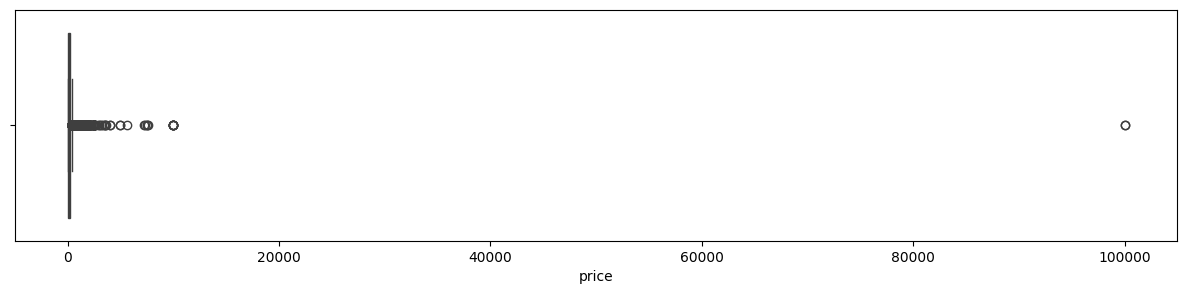

In [76]:
# Identifying Outliers in `price` column:
plt.figure(figsize = (15,3))
sns.boxplot(data = data, x = 'price')
plt.show()

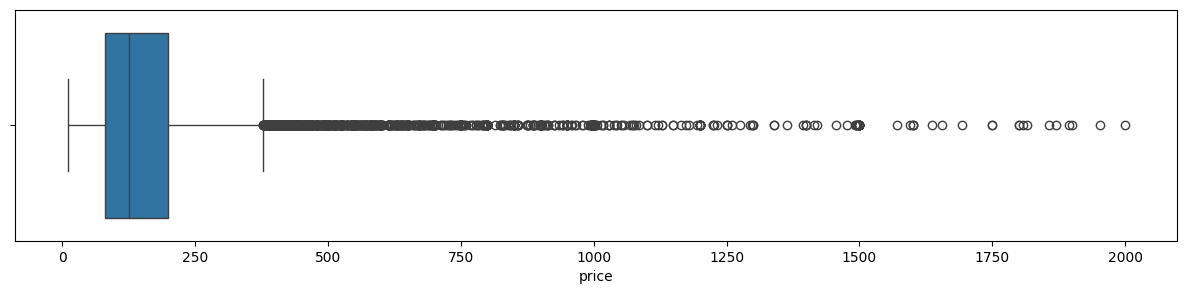

In [77]:
# Excluding Outliers in `price` column:
plt.figure(figsize = (15,3))
df1 = data[data['price']<2000]
sns.boxplot(data = df1, x = 'price')
plt.show()

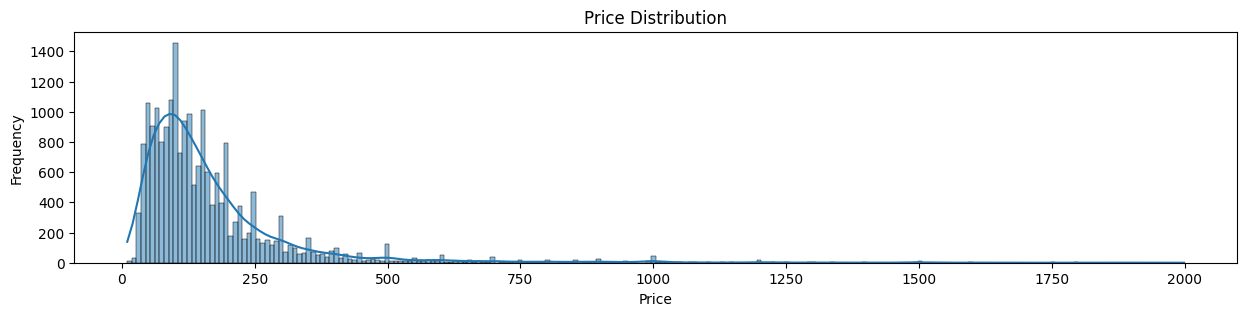

In [78]:
# Price Distribution:
plt.figure(figsize = (15,3))
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
sns.histplot(data = df1, x = 'price', kde = True)
plt.show()

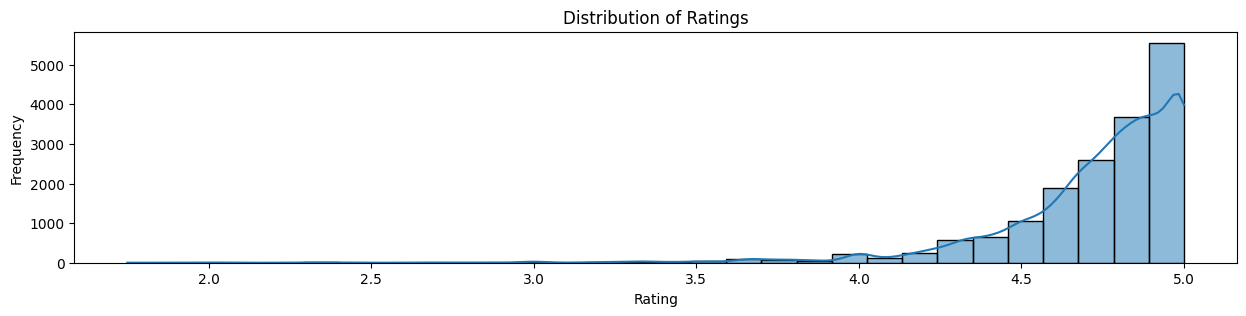

In [ ]:
# Rating Distribution:
plt.figure(figsize = (15,3))
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

df2 = df1.copy()                                                 # Creating a copy of df1 to avoid modifying the original
df2 = df2[df2['rating'] != 'No rating']                          # Removing Entries: 'No Rating'
df2['rating'] = pd.to_numeric(df2['rating'], errors = 'coerce')  # Converting to numeric dtype and non-numeric values to NULL

sns.histplot(df2['rating'], bins=30, kde=True) 

plt.show()

5B. Bivariate Analysis:

In [101]:
# Average Price Distribution Across Neighbourhood:
df1.groupby(by = 'neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx            107.990506
Brooklyn         156.133411
Manhattan        208.207212
Queens           122.128895
Staten Island    118.780069
Name: price, dtype: float64

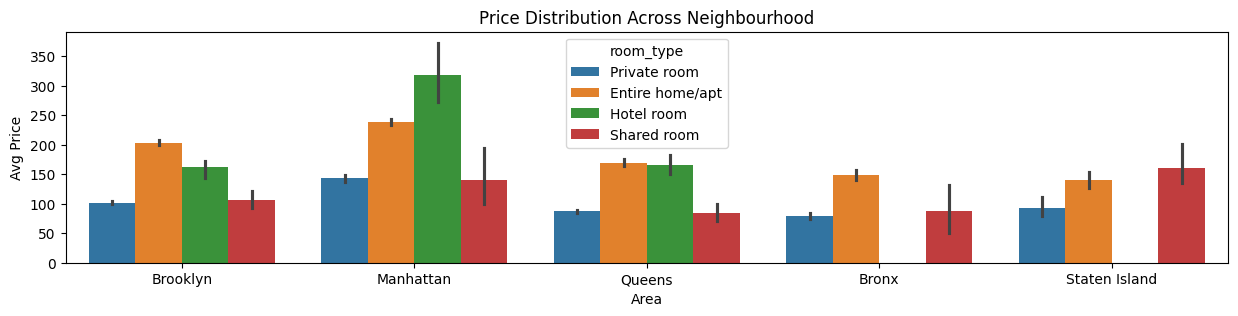

In [88]:
plt.figure(figsize = (15,3))
plt.title('Price Distribution Across Neighbourhood')
plt.xlabel('Area')
plt.ylabel('Avg Price')
sns.barplot(data = df1, x = 'neighbourhood_group', y = 'price', hue = 'room_type')
plt.show()

In [104]:
# Average Price/-Bed Distribution Across Neighbourhood:
df1.loc[:, 'price_per_bed'] = df1['price'] / df1['beds']
df1.groupby(by = 'neighbourhood_group')['price_per_bed'].mean()

neighbourhood_group
Bronx             74.713639
Brooklyn         100.065800
Manhattan        140.491709
Queens            76.795242
Staten Island     67.728101
Name: price_per_bed, dtype: float64

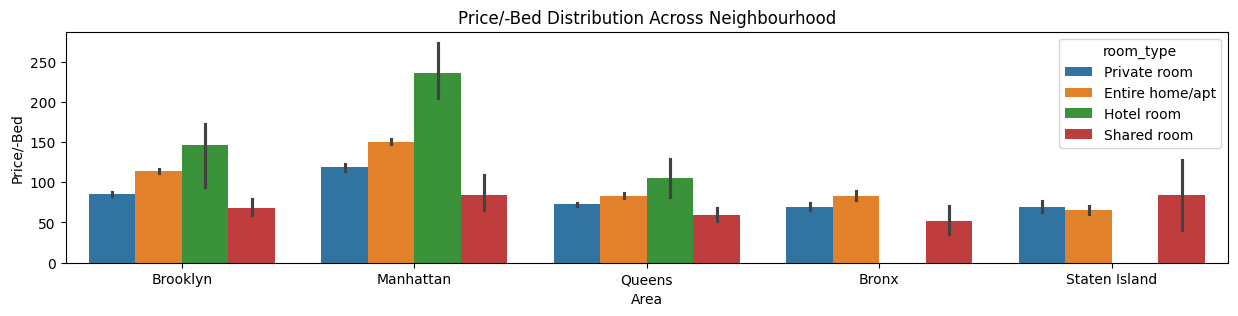

In [103]:
plt.figure(figsize = (15,3))
plt.title('Price/-Bed Distribution Across Neighbourhood')
plt.xlabel('Area')
plt.ylabel('Price/-Bed')

sns.barplot(data = df1, x = 'neighbourhood_group', y = 'price_per_bed', hue = 'room_type')
plt.show()

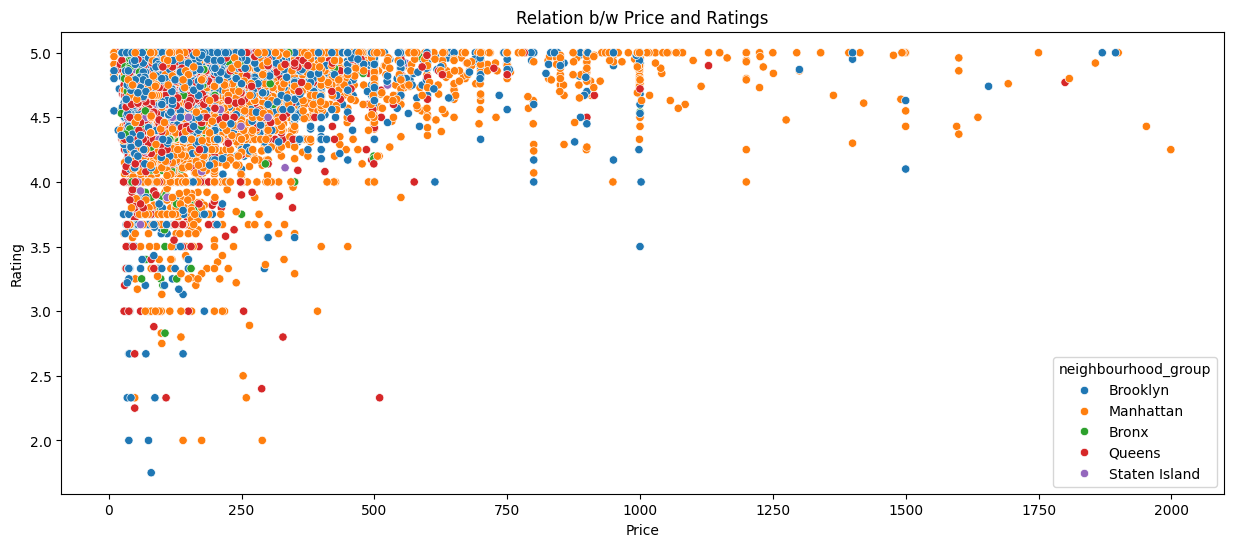

In [ ]:
# Relation b/w Price and Ratings:
plt.figure(figsize = (15,6))
plt.title('Relation b/w Price and Ratings')
plt.xlabel('Price')
plt.ylabel('Rating')

sns.scatterplot(data = df2, x='price', y='rating', hue = 'neighbourhood_group') 
plt.show()

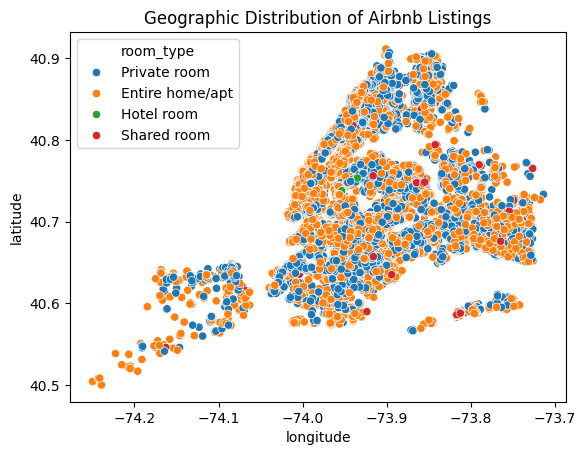

In [112]:
# Geographical Distribution:
sns.scatterplot(data = df1, x = 'longitude', y = 'latitude', hue = 'room_type')
plt.title('Geographic Distribution of Airbnb Listings')
plt.show()

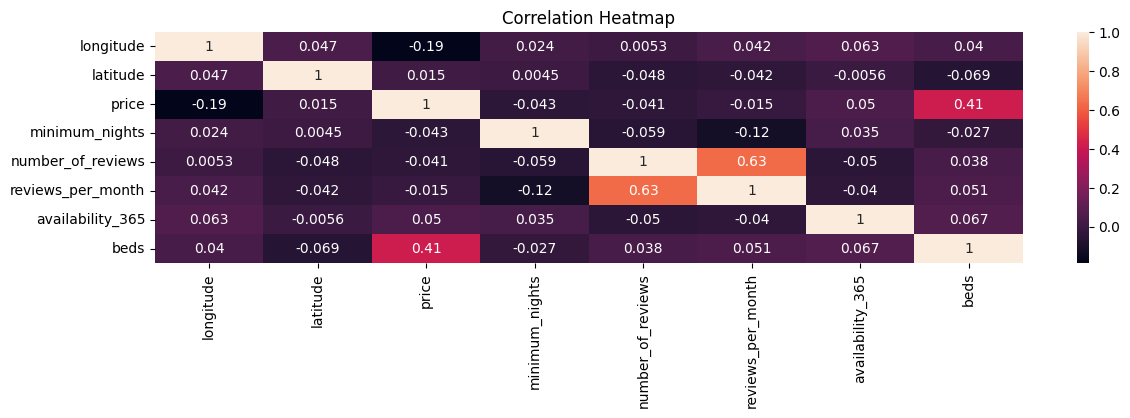

In [121]:
# Correlation of each variable with other variables:
plt.figure(figsize = (14,3))
corr = df1[['longitude', 'latitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'beds']].corr()
sns.heatmap(data = corr, annot = True) 
plt.title('Correlation Heatmap')
plt.show()